In [53]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from keras.utils.vis_utils import plot_model

In [54]:
# carregar o dataset, usando skiprows para pular o cabeçalho
dataframe = pandas.read_csv("iris.csv", skiprows=1, header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]


In [55]:
# usando o LabelEncoder para converter as espécies em integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)

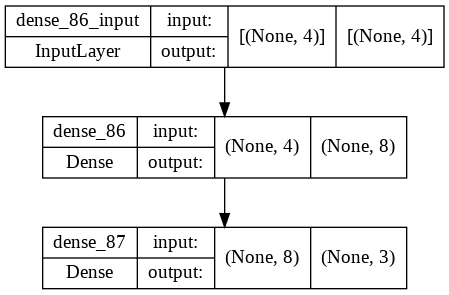

In [57]:

# criando o modelo
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])           
	return model

plot_model(baseline_model(), show_shapes=True, show_layer_names=True)


In [58]:
#treinando 200 épocas e avaliando o modelo com k-Fold 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Acuracia: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


27/27 [==============================] - 0s 1ms/step - loss: 2.0795 - accuracy: 0.3259
Epoch 2/200
27/27 [==============================] - 0s 1ms/step - loss: 1.5898 - accuracy: 0.3259
Epoch 3/200
27/27 [==============================] - 0s 1ms/step - loss: 1.2714 - accuracy: 0.3259
Epoch 4/200
27/27 [==============================] - 0s 1ms/step - loss: 1.1256 - accuracy: 0.3259
Epoch 5/200
27/27 [==============================] - 0s 2ms/step - loss: 1.0595 - accuracy: 0.3481
Epoch 6/200
27/27 [==============================] - 0s 1ms/step - loss: 1.0104 - accuracy: 0.3333
Epoch 7/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9716 - accuracy: 0.3556
Epoch 8/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9302 - accuracy: 0.5037
Epoch 9/200
27/27 [==============================] - 0s 1ms/step - loss: 0.9008 - accuracy: 0.6074
Epoch 10/200
27/27 [==============================] - 0s 2ms/step - loss: 0.8704 - accuracy: 0.6667
Epoch 11/200
27/27 [=